# Space X Falcon 9 First Stage Landing Prediction
### **Machine Learning Prediction**
![Falcon 9](../images/falcon9.webp)
### Objectives:
* Perform exploratory Data Analysis and determine Training Labels
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
     * Find the method performs best using test data

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


***


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler


This function is to plot the confusion matrix.


In [38]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [39]:
data = pd.read_csv('../csv/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1.0,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0003,-80.577366,28.561857,0
1,2.0,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0005,-80.577366,28.561857,0
2,3.0,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0007,-80.577366,28.561857,0
3,4.0,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1003,-120.610829,34.632093,0
4,5.0,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1004,-80.577366,28.561857,0


In [40]:
X = pd.read_csv('../csv/dataset_part_3.csv')
X.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6123.547647,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87.0,2020-10-06,Falcon 9,15600.000000,True ASDS,3.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,2020-10-18,Falcon 9,15600.000000,True ASDS,6.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,2020-10-24,Falcon 9,15600.000000,True ASDS,3.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89,90.0,2020-11-05,Falcon 9,3681.000000,True ASDS,1.0,1.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


NumPy array from the column <code>Class</code> in <code>data</code>.

In [41]:
Y = data['Class'].to_numpy()
type(Y)

numpy.ndarray

In [42]:
non_numeric_columns = X.select_dtypes(exclude=['float', 'int']).columns
numeric_columns = X.select_dtypes(include=['float', 'int']).columns

In [43]:
X_numeric = X[numeric_columns]
scaler = preprocessing.StandardScaler()
X_numeric_standardized = scaler.fit_transform(X_numeric)

In [44]:
X_standardized = pd.concat([pd.DataFrame(X_numeric_standardized, columns=numeric_columns), X[non_numeric_columns]], axis=1)

In [45]:
X[0:5]

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6123.547647,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_standardized_array = X_standardized.values
print(X_standardized_array)

[[-1.7129115371395962 -1.9434373691444355e-16 -0.6539128396553676 ...
  '2010-06-04' 'Falcon 9' 'None None']
 [-1.6744191430465716 -1.1963155683062205 -0.6539128396553676 ...
  '2012-05-22' 'Falcon 9' 'None None']
 [-1.635926748953547 -1.1638357221307443 -0.6539128396553676 ...
  '2013-03-01' 'Falcon 9' 'None None']
 ...
 [1.6744191430465716 2.0249586494260527 1.0038943594709162 ...
  '2020-10-24' 'Falcon 9' 'True ASDS']
 [1.7129115371395962 -0.5219313937680411 -0.6539128396553676 ...
  '2020-11-05' 'Falcon 9' 'True ASDS']
 [nan -1.9434373691444355e-16 nan ... nan nan nan]]


### Training and Testing
* Data split into training and testing data using the  function  <code>train_test_split</code>.   
* The training data is divided into validation data, a second set used for training  data; 
* Then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [48]:
Y_test.shape

(19,)

#### Objective:
* Logistic regression object 
* GridSearchCV object  <code>logreg_cv</code> with cv = 10.  
* Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [49]:
label_encoder = LabelEncoder()
X_train_encoded = X_train.apply(label_encoder.fit_transform)

In [50]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [51]:
parameters = {
    'classifier__C': [0.01, 0.1, 1],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}


In [52]:
logreg_cv = GridSearchCV(estimator=pipeline, cv=10, param_grid=parameters)

In [53]:
logreg_cv.fit(X_train_encoded, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']})

* Output of the <code>GridSearchCV</code> object for logistic regression.
* Display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [62]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
accuracy : 0.9857142857142858


### Accuracy on the test data using the method <code>score</code>:
* Confusion matrix

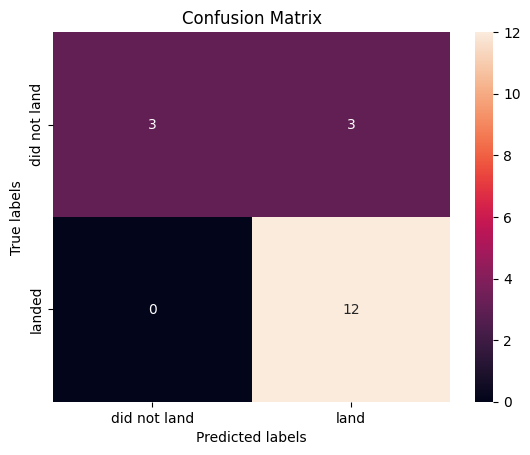

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽👆🏽
* Logistic regression can distinguish between the different classes. 
* The major problem is false positives.


### Creating Support vector machine object
* <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  
* Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [18]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


### Calculating the accuracy on the test data using the method <code>score</code>:


In [19]:
print("accuracy :", svm_cv.score(X_test, Y_test))

accuracy : 0.8333333333333334


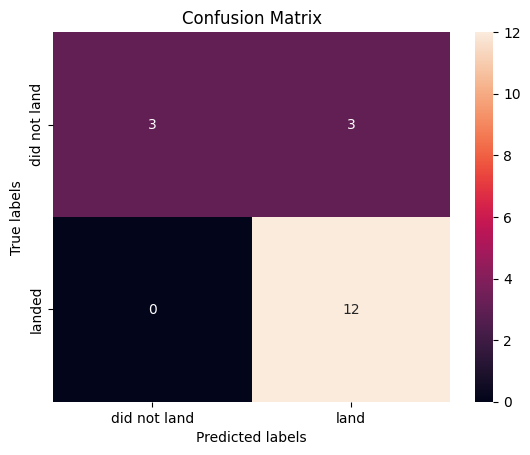

In [20]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Creating a decision tree classifier object
* creating a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  
* Fiting the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [22]:
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters)
tree_cv.fit(X_train, Y_train)

C:\Users\mbeua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mbeua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mbeua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857145


### Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [24]:
print("accuracy :", tree_cv.score(X_test, Y_test))

accuracy : 0.8333333333333334


We can plot the confusion matrix


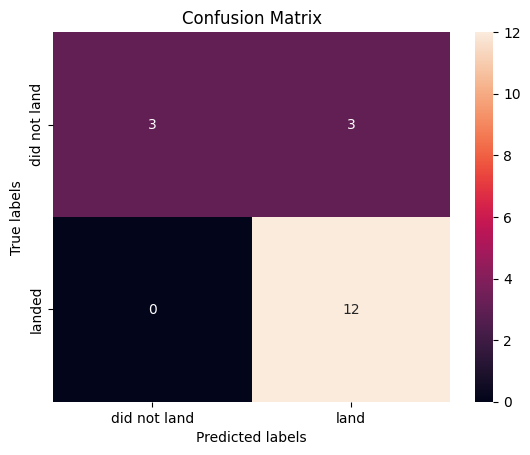

In [25]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Creating a k nearest neighbors object
* creating a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  
* Fiting the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [27]:
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [29]:
print("accuracy :", knn_cv.score(X_test, Y_test))

accuracy : 0.8333333333333334


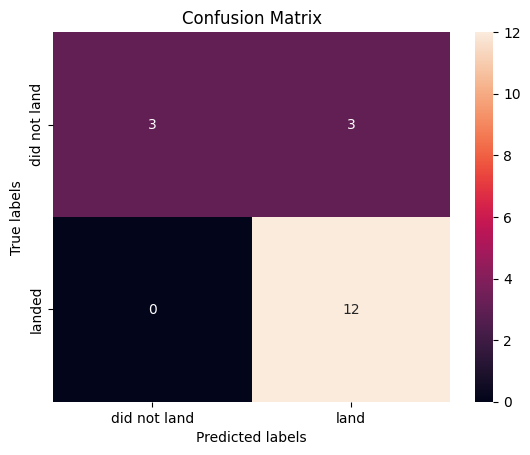

In [30]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Finding the method performs best:


In [31]:
print("Model\t\tAccuracy\tTestAccuracy")#,logreg_cv.best_score_)
print("LogReg\t\t{}\t\t{}".format((logreg_cv.best_score_).round(5), logreg_cv.score(X_test, Y_test).round(5)))
print("SVM\t\t{}\t\t{}".format((svm_cv.best_score_).round(5), svm_cv.score(X_test, Y_test).round(5)))
print("Tree\t\t{}\t\t{}".format((tree_cv.best_score_).round(5), tree_cv.score(X_test, Y_test).round(5)))
print("KNN\t\t{}\t\t{}".format((knn_cv.best_score_).round(5), knn_cv.score(X_test, Y_test).round(5)))

comparison = {}

comparison['LogReg'] = {'Accuracy': logreg_cv.best_score_.round(5), 'TestAccuracy': logreg_cv.score(X_test, Y_test).round(5)}
comparison['SVM'] = {'Accuracy': svm_cv.best_score_.round(5), 'TestAccuracy': svm_cv.score(X_test, Y_test).round(5)}
comparison['Tree'] = {'Accuracy': tree_cv.best_score_.round(5), 'TestAccuracy': tree_cv.score(X_test, Y_test).round(5)}
comparison['KNN'] = {'Accuracy': knn_cv.best_score_.round(5), 'TestAccuracy': knn_cv.score(X_test, Y_test).round(5)}


Model		Accuracy	TestAccuracy


AttributeError: 'float' object has no attribute 'round'

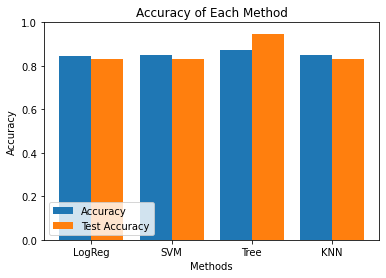

In [ ]:
x = []
y1 = []
y2 = []
for meth in comparison.keys():
    x.append(meth)    
    y1.append(comparison[meth]['Accuracy'])
    y2.append(comparison[meth]['TestAccuracy'])
    

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label = 'Accuracy')
plt.bar(x_axis + 0.2, y2, 0.4, label = 'Test Accuracy')

plt.ylim([0,1])
plt.xticks(x_axis, x)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Method")
plt.legend(loc='lower left')
plt.show()
    

## Author


[Helena Pedro](https://www.linkedin.com/in/helena-mbeua-pedro/) is a Data Scientist at Millennium Atlantic Bank in Angola. She is a Creative big thinker passionated about using data and optimization tools to direct decision making and solve complex and large-scale challenges.
- **Email:** mbeua94@gmail.com

Copyright © 2024
